In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

%run utility_functions.py # functions reused throughout

-1    4849
 1    1001
Name: cleave, dtype: int64

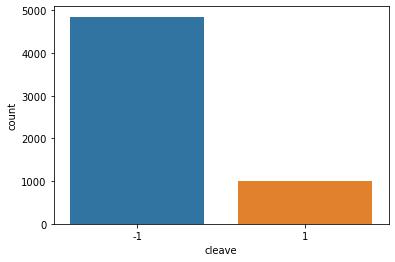

In [2]:
# Dataset source:
#http://archive.ics.uci.edu/ml/datasets/HIV-1+protease+cleavage#
# combined all datasets, removing duplicates

# Read in data
data = pd.read_csv('../data/HIV_DataSet.csv', sep=',')

sns.countplot(data['cleave']) # plot number of things with each value
# number of negative cleave values versus positive.
data['cleave'].value_counts(sort=True)
# skewed toward predicting negative because more examples?

In [3]:
# Create training, testing, and validation sets

X = data.drop('cleave', axis=1) # last value is the cleavage
y = data['cleave']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) # 80/20 default

In [4]:
clf = KNeighborsClassifier()

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20],
              'p': [1,2],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights': ['uniform', 'distance']
             }

# scorer for parameter combinations
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, cv=10, n_jobs=4)
grid_obj = grid_obj.fit(x_train, y_train)

# Set clf to best combination of parameters
clf = grid_obj.best_estimator_


In [5]:
# train model
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=1,
                     weights='distance')

No Skill: ROC AUC=0.500
Model: ROC AUC=0.810


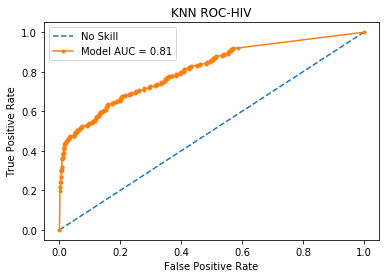

Model: f1=0.563 auc=0.631


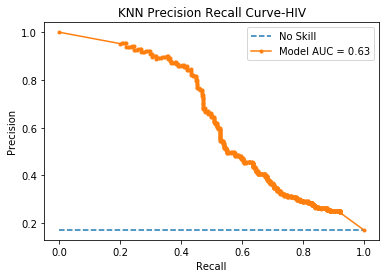

Classification Report
              precision    recall  f1-score   support

          -1       0.89      0.98      0.94       969
           1       0.84      0.42      0.56       201

    accuracy                           0.89      1170
   macro avg       0.87      0.70      0.75      1170
weighted avg       0.88      0.89      0.87      1170

Confusion Matrix
[[953  16]
 [116  85]]
Accuracy
0.8871794871794871
Balanced Accuracy
0.7031868521171234


<module 'matplotlib.pyplot' from 'c:\\users\\spcbe\\miniconda3\\envs\\ml_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

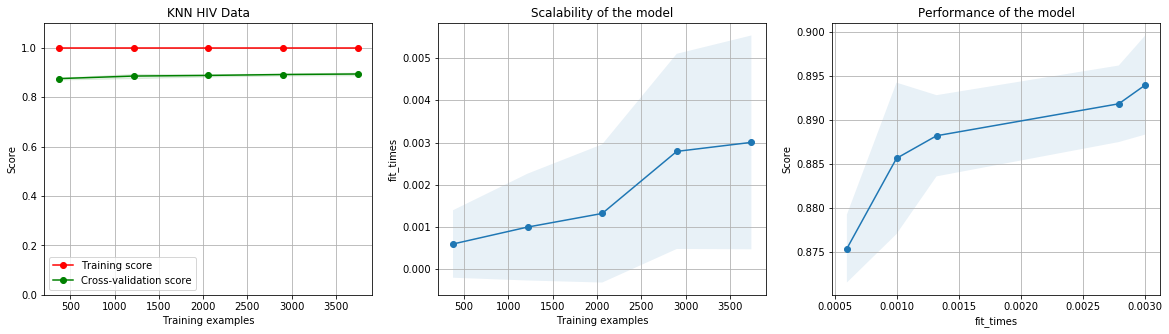

In [7]:
# test
y_predict = clf.predict(x_test)

# ROC
plot_roc(clf, x_test, y_test, y_predict, 'KNN ROC-HIV')
# Recall_precision_curve
plot_precision_recall_curve(clf, x_test, y_test, y_predict, 'KNN Precision Recall Curve-HIV')

# how did we do? Comparing y_test and predicted values
print('Classification Report')
print(classification_report(y_test, y_predict,zero_division=1))
print('Confusion Matrix')
# how to interpret: https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28
print(confusion_matrix(y_test, y_predict))
print('Accuracy')
print(accuracy_score(y_test, y_predict))

# for unbalanced data
print('Balanced Accuracy')
print(balanced_accuracy_score(y_test, y_predict))

# 1.1 so I can see the top of the plot
plot_learning_curve(clf, "KNN HIV Data", x_train, y_train, ylim=[0,1.1])

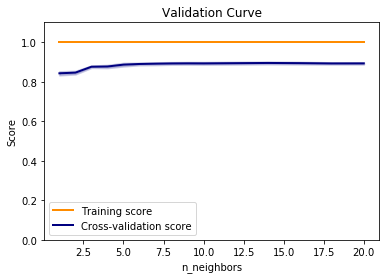

In [8]:
plot_model_complexity_analysis(clf, 'n_neighbors', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20], 'KNN_HIV', x_train, y_train)

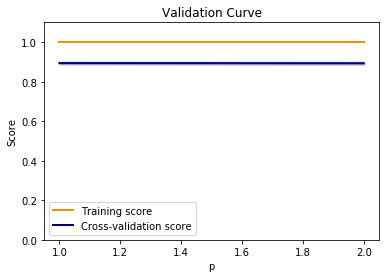

In [9]:
plot_model_complexity_analysis(clf, 'p', [1, 2],'KNN_HIV', x_train, y_train)

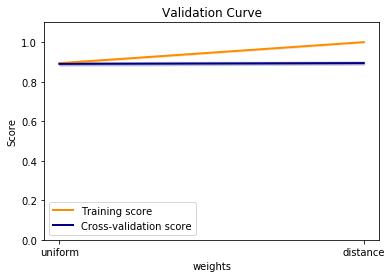

In [10]:
plot_model_complexity_analysis(clf, 'weights', ['uniform', 'distance'], 'KNN_HIV', x_train, y_train)

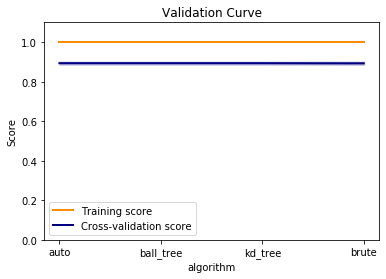

In [11]:
plot_model_complexity_analysis(clf, 'algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'], 'KNN_HIV', x_train, y_train)